##Question 1 (a) 

Vortex Panel Method

Linear Vortex Panel Method: In Linear vortex panel method the 2D body is divided into m planar panels. These panels are numbered in a clockwise manner starting from the trailing and the last panel ends again at the trailing edge. The normal component of velocity must vanish on each panel at the control point. 
$$ V(X^{i},Z^{i}) \cdot \hat{n^{i}}=0  $$

$$\sum_{j=1}^{m} \left(C_{i,j}^{n1} \gamma_{j}^{'} + C_{i,j}^{n2} \gamma_{j+1}^{'}\right) = sin(\theta^{i} - \alpha) \quad \quad ..(i)$$

Where $ C_{i,j}^{n1} $ and $ C_{i,j}^{n2}$  are the normal influence coefficients 


The Normal influence coefficients can be simplied as shown
$$ C_{i,j}^{n1} = 0.5DF +CD - C_{i,j}^{n2}$$
$$ C_{i,j}^{n2} = D+ 0.5QF/ l^{j} -(AC+DE)G/l^{j}$$ 

where,

$$A = -(X^{i} - X_{j}) cos\theta^{j} - (Z^{i} - Z_{j}) sin\theta^{j}$$
$$B = (X^{i} - X_{j})^2 + (Z^{i} - Z_{j})^2  $$
$$C  = sin(\theta^{i} - \theta^{j})$$
$$D  = cos(\theta^{i} - \theta^{j})$$
$$E = -(X^{i} - X_{j}) sin\theta^{j} - (Z^{i} - Z_{j}) cos\theta^{j}$$
$$F = ln\mid 1+ \frac{(l^j)^2 + 2l^{j}A}{B}\mid = 2 ln\mid\frac{r_{i,j+1}}{r_{i,j}}  \mid$$
$$G =  tan^{-1} \frac{El^{j}}{B + Al^{j}} = tan^{-1} \frac{Z^{i} - Z_{j}}{X^{i} - X_{j}} - tan^{-1} \frac{Z^{i} - Z_{j+1}}{X^{i} - X_{j+1}} $$
$$P = (X^{i} - X_{j}) sin(\theta^{i} - 2\theta^{j}) + (Z^{i} - Z_{j}) cos(\theta^{i} - 2\theta^{j}) $$
$$Q = (X^{i} - X_{j}) cos(\theta^{i} - 2\theta^{j}) - (Z^{i} - Z_{j}) sin(\theta^{i} - 2\theta^{j}) $$

The Coefficients simplifies for $i=j$ as follows

$ C_{i,i}^{n1}=-1 \quad C_{i,i}^{n2}=1$


The final constraint is the Kutta condition. 
$$ \gamma_1^{'}+\gamma_{m+1}^{'} =0 $$

From Eqn(i)  we have $m$ linear equations with $m+1$ unknowns. Applying the kutta condition we get $m+1$ equations with $m+1$ unknowns. These can be written in a convnient from as shown below.
$$W \eta = \zeta $$

where $\eta=[\gamma_1',\gamma_2',......,\gamma_{m+1}']^T$. For $i \in[1,m]$

$$ \zeta_{i} = sin(\theta^{i} -\alpha); \quad W_{i,1} = C_{i,1}^{n1}; \quad W_{i,m+1} = C_{i,m}^{n2} \quad W_{i,j} = C_{i,j-1}^{n2} + C_{i,j}^{n1} \quad \forall j \in [2,m]$$

for $i=m+1$
$$ \zeta_{m+1} = 0; \quad W_{m+1,1} = 1; \quad W_{m+1,m+1} = 1 \quad W_{m+1,j} = 0 \quad \forall j \in [2,m]$$


The tangential component of velocity at the control point of the $i^{it}$ panel can be written as $$\frac{V_t^i}{V_{\infty}}=cos(\theta^i-\alpha)+ \sum_{j=1}^{m}(C_{i,j}^{t1} \gamma_{j}^{'} + C_{i,j}^{t2} \gamma_{j+1}^{'}) \quad \quad \forall i \in [1,m]$$ 

Where $C_{i,j}^{t1} \gamma_{j}^{'}$ and $C_{i,j}^{t2} \gamma_{j+1}^{'}$ are the tangential influence coefficients.

The Tangential influence coefficients can be further simplfied to, 
$$C_{i,j}^{t2} \gamma_{j+1}^{'}=C+0.5PF/l^j+(AD-CE)G/l^j$$
$$C_{i,j}^{t1} \gamma_{j+1}^{'}=0.5CF-DG-C_{i,j}^{t2} \gamma_{j+1}^{'}$$

For the case of $i=j$ the coefficients are as follows $C_{i,j}^{t1}=\pi/2$ and $C_{i,j}^{t2}=\pi/2$



In [ ]:
import math
import numpy as np

""" Vortex panel method for 2D bodies, using method from Kuethe's textbook

    ATTRIBUTES:
    nPnl     : No. of panels
    fu       : Upper surface function (takes x/c, returns y/c for upper surface)
    fl       : Lower surface function (takes x/c, returns y/c for lower surface)
    coords   : Coordinates of nodes on airfoil surface (panels' end-points)
    iNodesU  : Indices of surface nodes that are on upper surface
    iNodesL  : Indices of surface nodes that are on lower surface
    iPanelsU : Indices of panels that are on upper surface
    iPanelsL : Indices of panels that are on lower surface
    pnlWds   : Panel widths
    pnlMids  : Panel mid-points
    pnlAngs  : Panel angles (from intial to final point, w.r.t. x-axis)
    pnlNrms  : Panel normal unit vectors
    pnlTngts : Panel tangent unit vectors
    inflNrm  : 2D array of panel-normal velocity influence coefficients
    inflTngt : 2D array of panel-tangential velocity influence coefficients
    
    METHODS:
    _calcCoords     : Calculate nodes' coordinates from body's surface functions
    _calcInflCoeffs : Calculate all influence coefficients
    solve           : Solve for vortex strengths & auxiliary results for an AoA
"""

class VortexPanel2D(object):
    
    """ Initialize class by setting the geometry of the 2D body
    
        INPUTS:
        coords : Panel coordinates, starting from trailing edge, going along the
                 lower surface to the leading edge, then going along the upper
                 surface back to the trailing edge (first and last points are
                 same to close the body)
        
        OUTPUTS:
        None
    """    
    def __init__(self,nPnl,fu,fl):
        """ Specified attribute(s) """
        self.nPnl = nPnl    #No. of panels
        self.fu = fu        #Function that returns y-coords of upper surface
        self.fl = fl        #Function that returns y-coords of lower surface
        
        """ Calculate coordinates of nodes on airfoil """
        self._calcCoords()
                
        """ Derived attributes """
        # Panel widths
        self.pnlWds \
            = np.sqrt(np.sum(np.square(np.diff(self.coords,axis=0)),axis=1))
        # Panel mid-points
        self.pnlMids = (self.coords[:-1,:] + self.coords[1:,:])/2
        # Panels' angles
        self.pnlAngs = np.arctan2(np.diff(self.coords[:,1]), \
            np.diff(self.coords[:,0]))
        # Panels' unit normals
        self.pnlNrms = np.zeros_like(self.coords[:-1,:])
        self.pnlNrms[:,0] = -np.sin(self.pnlAngs)
        self.pnlNrms[:,1] = np.cos(self.pnlAngs)
        # Panels' unit tangents
        self.pnlTngts = np.zeros_like(self.coords[:-1,:])
        self.pnlTngts[:,0] = np.cos(self.pnlAngs)
        self.pnlTngts[:,1] = np.sin(self.pnlAngs)
        
        """ Influence coefficients, based only on the geometry """
        self._calcInflCoeffs()
    #enddef __init__

    """ Calculate nodes' coordinates from body's surface functions.
        Distributes nodes using trigonometric interpolation, so as to cluster
        panels near leading and trailing edges.
        This function will typically be called by the initializer.
        
        INPUTS:
        None
        
        OUTPUTS:
        None
    """
    def _calcCoords(self):
        if not np.allclose(self.fl(1.),self.fu(1.)):
            raise Exception('Cannot handle body whose trailing edge is not sharp')
        nNodes = self.nPnl + 1  #No. of nodes at ends of panels
        thetas = np.linspace(-1,1,nNodes)*math.pi #nNodes-array from -pi to pi
        self.iNodesL = np.where(thetas <= 0)[0] #Indices of lower surface nodes
        self.iNodesU = np.where(thetas > 0)[0]  #Indices of upper surface nodes
        if self.nPnl % 2:
            self.iPanelsL = range(int((self.nPnl+1)/2))
        else:
            self.iPanelsL = range(int(self.nPnl/2))
        self.iPanelsU = range(len(self.iPanelsL),self.nPnl)
        self.coords = np.zeros((nNodes,2))
        # x-coordinates (same on lower and upper surface)
        self.coords[:,0] = 0.5*(1 - np.cos(thetas)) #x-coordinates
        # y-coordinates on lower surface
        self.coords[self.iNodesL,1] = self.fl(self.coords[self.iNodesL,0])
        # y-coordinates on upper surface
        self.coords[self.iNodesU,1] = self.fu(self.coords[self.iNodesU,0])
    #enddef _calcCoords

    """ Calculate influence coefficients for panel-normal velocity and
        panel-tangential velocity, based only on the geometry; these are valid
        for all angles-of-attack as long as the geometry doesn't change.
        This function will typically be called by the initializer.
        
        INPUTS:
        None
        
        OUTPUTS:
        None
    """
    def _calcInflCoeffs(self):
        self.inflNrm = np.zeros((self.nPnl,self.nPnl+1))
        self.inflTngt = np.zeros_like(self.inflNrm)
        for iObs in range(self.nPnl): #All constraint (observer) panels
            """ Calculate influence coefficients in vectorized form (i.e., for
                all vortices at once) corresponding to current observer panel
            """
            # x- & y-components of vectors from panels' starting points to the
            # mid-point of the current observer panel
            xij = self.pnlMids[iObs,0] - self.coords[:-1,0]
            yij = self.pnlMids[iObs,1] - self.coords[:-1,1]
            # Angle of current observer panel (w.r.t. x-axis)
            ai = self.pnlAngs[iObs]
            # Various intermediate terms defined in Kuethe (all are arrays)
            A = -xij*np.cos(self.pnlAngs) - yij*np.sin(self.pnlAngs)
            
            B = np.square(xij) + np.square(yij)
            C = np.sin(ai - self.pnlAngs)
            D = np.cos(ai - self.pnlAngs)
            E = xij*np.sin(self.pnlAngs) - yij*np.cos(self.pnlAngs)
            F = np.log(1+(np.square(self.pnlWds)+2*A*self.pnlWds)/B)
            G = np.arctan2(E*self.pnlWds,B+A*self.pnlWds)
            P = xij*np.sin(ai-2*self.pnlAngs) + yij*np.cos(ai-2*self.pnlAngs)
            Q = xij*np.cos(ai-2*self.pnlAngs) - yij*np.sin(ai-2*self.pnlAngs)
            # Normal-velocity influence coefficients 
            Cn2ij = D + 0.5*Q*F/self.pnlWds - (A*C+D*E)*G/self.pnlWds
            Cn1ij = 0.5*D*F + C*G - Cn2ij
            Cn2ij[iObs] = 1         #Special case of same panel (i = j)
            Cn1ij[iObs] = -1        #Special case of same panel (i = j)
            self.inflNrm[iObs,:-1] += Cn1ij #Register in respective nodes
            self.inflNrm[iObs,1:] += Cn2ij  #Register in respective next nodes
            Ct2ij = C + 0.5*P*F/self.pnlWds + (A*D-C*E)*G/self.pnlWds
            Ct1ij = 0.5*C*F - D*G - Ct2ij
            Ct2ij[iObs] = math.pi/2 #Special case of same panel (i = j)
            Ct1ij[iObs] = math.pi/2 #Special case of same panel (i = j)
            self.inflTngt[iObs,:-1] += Ct1ij#Register in respective nodes
            self.inflTngt[iObs,1:] += Ct2ij #Register in respective next nodes
    #enddef _calcInflCoeffs

    """ Solve for vortex strengths & auxiliary results
        
        INPUTS:
        AoADeg : Angle-of-attack for which solution is desired [degrees]
        
        OUTPUTS:
        gammaP  : Circulation density at the nodes between panels (1D array with
                  nPnl+1 entries)
        Vts     : Tangential velocities on panels (1D array with nPnl entries)
        c_p     : Pressure coefficient on panels (1D array with nPnl entries)
        c_l     : Lift coefficient computed from c_p (area included in curve)
        c_l_alt : Lift coefficient computed from circulation around all panels
    """
    def solve(self,AoADeg):
        AoARad = math.radians(AoADeg)   #Convert AoA to radians
        M = np.zeros((self.nPnl+1,self.nPnl+1)) #Create matrix to solve (invert)
        M[:-1,:] = self.inflNrm         #Register influence coefficients
        M[-1,0] = 1;    M[-1,-1] = 1    #Register Kutta condition
        N = np.zeros((self.nPnl+1))     #Vector of constraints
        N[:-1] = np.sin(self.pnlAngs-AoARad)    #Normal velocity from freestream
        gammaP = np.linalg.solve(M,N)   #Solve the problem (linear solver)
        # Tangential velocities on panels (along their respective tangents)        
        Vts = np.cos(self.pnlAngs-AoARad) + np.dot(self.inflTngt,gammaP)
        # Pressure coefficient on panels
        c_p = 1 - np.square(Vts)
        # Net pressure force on body, normalized by dynamic head and chord
        f_x = - np.sum(c_p*self.pnlWds*self.pnlNrms[:,0])
        f_y = - np.sum(c_p*self.pnlWds*self.pnlNrms[:,1])


        # Lift coefficient from above force coefficients
        c_l = f_y*math.cos(AoARad) - f_x*math.sin(AoARad)

        # Alternative c_l from circulation
        c_l_alt = 2*math.pi*np.sum((gammaP[:-1]+gammaP[1:])*self.pnlWds)
        return gammaP, Vts, c_p, c_l, c_l_alt
    #enddef solve

#endclass VortexPanel2D

Input values: 
In case values are missing use default values that are given
Default values for Max_Thickness=0.12, Max_Camber=0.02, Location of Max_Camber=0.40 , Angle of Attack=8, No.of panels=48
Maximum Thickness: 0.12
Maximum Camber: 0.02
Location of Maximum Camber: 0.40
Angle of Attack: 8
Number of Panels: 48


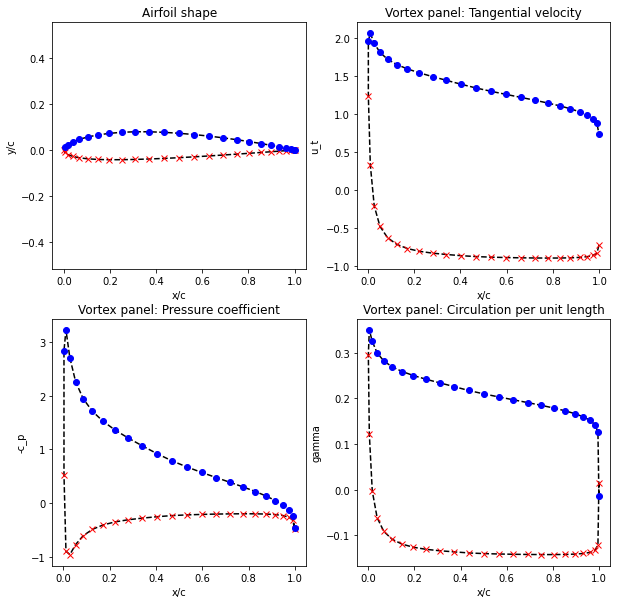

In [ ]:
import time, copy
import numpy as np
from matplotlib import pyplot as plt

print('Input values: ')
print("In case values are missing use default values that are given")
print('Default values for Max_Thickness=0.12, Max_Camber=0.02, Location of Max_Camber=0.40 , Angle of Attack=8, No.of panels=48')
mThk=float(input('Maximum Thickness: '))
mCmbr=float(input('Maximum Camber: '))
pCmbr=float(input('Location of Maximum Camber: '))
AoA=float(input('Angle of Attack: '))
nPnl=int(input('Number of Panels: '))

# Thickness function of NACA 4-digit airfoil series, with maximum thickness, 
# 'mThk', (as a fraction of chord) specified outside the function
#
# INPUT:
# x_by_c : Coordinate(s) along chord, normalized by chord (LE = 0; TE = 1);
#          can be scalar (single) value or array of coordinates
#
# OUTPUT:
# thk : Thickness at supplied chord locations; size is same as x_by_c
def y_t(x_by_c):
    if np.any(x_by_c < 0) or np.any(x_by_c > 1):
        raise Exception('Argument cannot be outside [0, 1]')
    thk = 5*mThk*(0.2969*np.sqrt(x_by_c) - 0.126*x_by_c \
        - 0.3516*np.square(x_by_c) + 0.2843*np.power(x_by_c,3) \
        - 0.1036*np.power(x_by_c,4))
    return thk

# Camber function of NACA 4-digit airfoil series, with maximum camber, 'mCmbr',
# and its position, 'pCmbr', (both as fraction of chord) specified outside the
# function
#
# INPUT:
# x_by_c : Coordinate(s) along chord, normalized by chord (LE = 0; TE = 1);
#          can be scalar (single) value or array of coordinates
#
# OUTPUT:
# thk : Thickness at supplied chord locations; size is same as x_by_c
def y_c(x_by_c):
    singleton = False
    if not isinstance(x_by_c,np.ndarray):
        singleton = True
        x_copy = np.array([x_by_c]) #Create a new singleton array
    else:
        x_copy = copy.deepcopy(x_by_c) #Make a copy (instead of a pointer)
    cmbr = np.zeros_like(x_copy)
    iL = x_copy <= pCmbr
    iT = x_copy > pCmbr
    cmbr[iL] = mCmbr/pCmbr**2*(2*pCmbr*x_copy[iL]-np.square(x_copy[iL]))
    cmbr[iT] = mCmbr/(1-pCmbr)**2 \
        *(1-2*pCmbr+2*pCmbr*x_copy[iT]-np.square(x_copy[iT]))
    if singleton:
        cmbr = cmbr[0] #Output dimension (scalar or array) must be same as input
    return cmbr        

# Upper surface function, using thickness and camber functions defined above
def y_u(x_by_c):
    return y_c(x_by_c) + y_t(x_by_c)

# Lower surface function, using thickness and camber functions defined above
def y_l(x_by_c):
    return y_c(x_by_c) - y_t(x_by_c)


# Solve the problem
t0 = time.time() # Note the current time

vp =VortexPanel2D(nPnl,y_u,y_l) #Instantiate vortex panel class with requisite inputs
gammaP, Vts, c_p, c_l, c_l_alt = vp.solve(AoA) #Solve for a particular AoA

#Creating the subplots in order to plot the graphs
plt.figure()
plt.subplot(2,2,4)
plt.title('Vortex panel: Circulation per unit length')
plt.plot(vp.coords[:,0],gammaP,'k--', \
    vp.coords[vp.iNodesL,0],gammaP[vp.iNodesL],'rx', \
    vp.coords[vp.iNodesU,0],gammaP[vp.iNodesU],'bo')
plt.xlabel('x/c');  plt.ylabel('gamma')
plt.subplot(2,2,2)
plt.title('Vortex panel: Tangential velocity')
plt.plot(vp.pnlMids[:,0],Vts,'k--', \
    vp.pnlMids[vp.iPanelsL,0],Vts[vp.iPanelsL],'rx', \
    vp.pnlMids[vp.iPanelsU,0],Vts[vp.iPanelsU],'bo')
plt.xlabel('x/c');  plt.ylabel('u_t')
plt.subplot(2,2,3)
plt.title('Vortex panel: Pressure coefficient')
plt.plot(vp.pnlMids[:,0],-c_p,'k--', \
    vp.pnlMids[vp.iPanelsL,0],-c_p[vp.iPanelsL],'rx', \
    vp.pnlMids[vp.iPanelsU,0],-c_p[vp.iPanelsU],'bo')
plt.xlabel('x/c');  plt.ylabel('-c_p')
plt.subplot(2,2,1)
plt.title('Airfoil shape')
plt.plot(vp.coords[:,0],vp.coords[:,1],'k--', \
    vp.coords[vp.iNodesL,0],vp.coords[vp.iNodesL,1],'rx', \
    vp.coords[vp.iNodesU,0],vp.coords[vp.iNodesU,1],'bo')
plt.xlabel('x/c');  plt.ylabel('y/c');  plt.axis('equal')
plt.rcParams["figure.figsize"] = (10,10)

##Question 1(b) 

Hess-smith method

In Hess-smith method we have constant density source panels with each having
a different density, each panel also had constant vorticity, but the vorticity was same in all the panels. 

The normal velocity vanishes at the control points

\begin{equation}
{\LARGE \Sigma_{j=1}^m}\left(\displaystyle{ \Sigma_{i,j}^n } q^{' j} +\displaystyle{ \Lambda_{i,j}^{n} }\tau^{'}\right)={\large \sin \left( \theta^{i}-\alpha \right)}\quad \quad \quad \quad {\large \forall i \in [1,m]} 
\end{equation}


Here, $\Sigma_{i,j}^n$ and $\Lambda_{i,j}^{n}$ are the two ‘normal influence coefficients'.


The tangential velocity at the control points of each panel are given by 


\begin{equation}
   \frac{\displaystyle{V_{t}^{i}}}{\displaystyle{V_{\infty}}}=\cos (\theta^{i}-\alpha)+{\LARGE \Sigma_{j=1}^m}\left(\displaystyle{ \Sigma_{i,j}^t } q^{' j} +\displaystyle{ \Lambda_{i,j}^{t} }\tau^{'}\right)\quad \quad \quad \quad {\large \forall i \in [1,m]} 
\end{equation}

Kutta Condition also gives us $V_{t}^{1}=-V^{m}_{t}$

The Hess-Smith Panel method influence coefficients are as follows:

$$\Sigma_{i,j}^n = \Lambda_{i,j}^{t} =0.5CF-DG$$

$$\Sigma_{i,j}^t = -\Lambda_{i,j}^{n} = -0.5DF-CG$$

The values of C,F,D,G are taken from the vortex panel method.

$$\Sigma_{i,i}^n = \Lambda_{i,i}^{t} = \pi$$

$$\Sigma_{i,i}^t = -\Lambda_{i,i}^{n} = 0$$

The pressure coefficient at control point of the $i^{th}$ panel is $C_p^i=1-(\frac{V_t^i}{V_{\infty}})^2$

In [ ]:
import math
import numpy as np

""" Hess Method

    ATTRIBUTES:
    nPnl     : No. of panels
    fu       : Upper surface function (takes x/c, returns y/c for upper surface)
    fl       : Lower surface function (takes x/c, returns y/c for lower surface)
    coords   : Coordinates of nodes on airfoil surface (panels' end-points)
    iNodesU  : Indices of surface nodes that are on upper surface
    iNodesL  : Indices of surface nodes that are on lower surface
    iPanelsU : Indices of panels that are on upper surface
    iPanelsL : Indices of panels that are on lower surface
    pnlWds   : Panel widths
    pnlMids  : Panel mid-points
    pnlAngs  : Panel angles (from intial to final point, w.r.t. x-axis)
    pnlNrms  : Panel normal unit vectors
    pnlTngts : Panel tangent unit vectors
    inflNrm  : 2D array of panel-normal velocity influence coefficients
    inflTngt : 2D array of panel-tangential velocity influence coefficients
    
    METHODS:
    _calcCoords     : Calculate nodes' coordinates from body's surface functions
    _calcInflCoeffs : Calculate all influence coefficients
    solve           : Solve for vortex strengths & auxiliary results for an AoA
"""
class Hess_Method(object):
    
    """ Initialize class by setting the geometry of the 2D body
    
        INPUTS:
        coords : Panel coordinates, starting from trailing edge, going along the
                 lower surface to the leading edge, then going along the upper
                 surface back to the trailing edge (first and last points are
                 same to close the body)
        
        OUTPUTS:
        None
    """    
    def __init__(self,nPnl,fu,fl):
        """ Specified attribute(s) """
        self.nPnl = nPnl    #No. of panels
        self.fu = fu        #Function that returns y-coords of upper surface
        self.fl = fl        #Function that returns y-coords of lower surface
        
        """ Calculate coordinates of nodes on airfoil """
        self._calcCoords()
                
        """ Derived attributes """
        # Panel widths
        self.pnlWds \
            = np.sqrt(np.sum(np.square(np.diff(self.coords,axis=0)),axis=1))
        # Panel mid-points
        self.pnlMids = (self.coords[:-1,:] + self.coords[1:,:])/2
        # Panels' angles
        self.pnlAngs = np.arctan2(np.diff(self.coords[:,1]), \
            np.diff(self.coords[:,0]))
        # Panels' unit normals
        self.pnlNrms = np.zeros_like(self.coords[:-1,:])
        self.pnlNrms[:,0] = -np.sin(self.pnlAngs)
        self.pnlNrms[:,1] = np.cos(self.pnlAngs)
        # Panels' unit tangents
        self.pnlTngts = np.zeros_like(self.coords[:-1,:])
        self.pnlTngts[:,0] = np.cos(self.pnlAngs)
        self.pnlTngts[:,1] = np.sin(self.pnlAngs)
        
        """ Influence coefficients, based only on the geometry """
        self._calcInflCoeffs()
    #enddef __init__

    """ Calculate nodes' coordinates from body's surface functions.
        Distributes nodes using trigonometric interpolation, so as to cluster
        panels near leading and trailing edges.
        This function will typically be called by the initializer.
        
        INPUTS:
        None
        
        OUTPUTS:
        None
    """
    def _calcCoords(self):
        if not np.allclose(self.fl(1.),self.fu(1.)):
            raise Exception('Cannot handle body whose trailing edge is not sharp')
        nNodes = self.nPnl + 1  #No. of nodes at ends of panels
        thetas = np.linspace(-1,1,nNodes)*math.pi #nNodes-array from -pi to pi
        self.iNodesL = np.where(thetas <= 0)[0] #Indices of lower surface nodes
        self.iNodesU = np.where(thetas > 0)[0]  #Indices of upper surface nodes
        if self.nPnl % 2:
            self.iPanelsL = range(int((self.nPnl+1)/2))
        else:
            self.iPanelsL = range(int(self.nPnl/2))
        self.iPanelsU = range(len(self.iPanelsL),self.nPnl)
        self.coords = np.zeros((nNodes,2))
        # x-coordinates (same on lower and upper surface)
        self.coords[:,0] = 0.5*(1 - np.cos(thetas)) #x-coordinates
        # y-coordinates on lower surface
        self.coords[self.iNodesL,1] = self.fl(self.coords[self.iNodesL,0])
        # y-coordinates on upper surface
        self.coords[self.iNodesU,1] = self.fu(self.coords[self.iNodesU,0])
    #enddef _calcCoords

    """ Calculate influence coefficients for panel-normal velocity and
        panel-tangential velocity, based only on the geometry; these are valid
        for all angles-of-attack as long as the geometry doesn't change.
        This function will typically be called by the initializer.
        
        INPUTS:
        None
        
        OUTPUTS:
        None
    """
    def _calcInflCoeffs(self):
        self.inflNrm = np.zeros((self.nPnl,self.nPnl+1))
        self.Sig_nij=np.zeros((self.nPnl,self.nPnl))
        self.Cnij=np.zeros((self.nPnl,self.nPnl))
        self.Sig_tij=np.zeros((self.nPnl,self.nPnl))
        self.Ctij=np.zeros((self.nPnl,self.nPnl))        
        self.inflTngt = np.zeros((self.nPnl,self.nPnl+1))
        for iObs in range(self.nPnl): #All constraint (observer) panels
            """ Calculate influence coefficients in vectorized form (i.e., for
                all vortices at once) corresponding to current observer panel
            """
            # x- & y-components of vectors from panels' starting points to the
            # mid-point of the current observer panel
            xij = self.pnlMids[iObs,0] - self.coords[:-1,0]
            yij = self.pnlMids[iObs,1] - self.coords[:-1,1]
            # Angle of current observer panel (w.r.t. x-axis)
            ai = self.pnlAngs[iObs]
            
            # Various intermediate terms defined in Kuethe (all are arrays)
            A = -xij*np.cos(self.pnlAngs) - yij*np.sin(self.pnlAngs)
            B = np.square(xij) + np.square(yij)
            C = np.sin(ai - self.pnlAngs)
            D = np.cos(ai - self.pnlAngs)
            E = xij*np.sin(self.pnlAngs) - yij*np.cos(self.pnlAngs)
            F = np.log(1+(np.square(self.pnlWds)+2*A*self.pnlWds)/B)
            G = np.arctan2(E*self.pnlWds,B+A*self.pnlWds)
            P = xij*np.sin(ai-2*self.pnlAngs) + yij*np.cos(ai-2*self.pnlAngs)
            Q = xij*np.cos(ai-2*self.pnlAngs) - yij*np.sin(ai-2*self.pnlAngs)
            
            # Normal-velocity influence coefficients 
            self.Sig_nij[iObs,:] = 0.5*C*F -D*G
            self.Cnij[iObs,:] = 0.5*D*F + C*G 
            self.Sig_nij[iObs,iObs] =math.pi         #Special case of same panel (i = j)
            self.Cnij[iObs,iObs] =0        #Special case of same panel (i = j)
            self.inflNrm[iObs,:-1]= self.Sig_nij[iObs,:] #Register in respective nodes
            self.inflNrm[iObs,-1] = np.sum(self.Cnij[iObs,:])  #Register in respective next nodes
            
            # Tangential-velocity influence coefficients
            self.Sig_tij[iObs,:] = -self.Cnij[iObs,:]
            self.Ctij[iObs,:] = 0.5*C*F - D*G 
            self.Sig_tij[iObs,iObs] = 0 #Special case of same panel (i = j)
            self.Ctij[iObs,iObs] = math.pi #Special case of same panel (i = j)
            self.inflTngt[iObs,:-1] = self.Sig_tij[iObs,:]#Register in respective nodes
            self.inflTngt[iObs,-1] = np.sum(self.Ctij[iObs,:]) #Register in respective next nodes
        
        #Applying Kutta condition 
        
        X=np.zeros((self.nPnl+1,self.nPnl+1))
        X[:-1,:] = self.inflNrm
        X[-1,:-1] = self.Sig_tij[0,:]+self.Sig_tij[-1,:]
        X[-1,-1] = np.sum(self.Ctij[0,:]+self.Ctij[-1,:])
        #Since X is not an attribute we reassign self.inflNrm to X so that it is accesible
        self.inflNrm=X 
        
    #enddef _calcInflCoeffs

    """ Solve for vortex strengths & auxiliary results
        
        INPUTS:
        AoADeg : Angle-of-attack for which solution is desired [degrees]
        
        OUTPUTS:
        gammaP  : Circulation density at the nodes between panels (1D array with
                  nPnl+1 entries)
        Vts     : Tangential velocities on panels (1D array with nPnl entries)
        c_p     : Pressure coefficient on panels (1D array with nPnl entries)
        c_l     : Lift coefficient computed from c_p (area included in curve)
        c_l_alt : Lift coefficient computed from circulation around all panels
    """
    def solve(self,AoADeg):
        AoARad = math.radians(AoADeg)   #Convert AoA to radians 
        M = self.inflNrm         #Register influence coefficients
        N = np.zeros((self.nPnl+1))     #Vector of constraints
        N[:-1] = np.sin(self.pnlAngs-AoARad)
        N[-1]=-(np.cos(self.pnlAngs[0]-AoARad)+np.cos(self.pnlAngs[-1]-AoARad))    #Normal velocity from freestream
        Density = np.linalg.solve(M,N)   #Solve the problem (linear solver)
        SourceP=Density[:-1]; gammaP=Density[-1];
        # Tangential velocities on panels (along their respective tangents)        
        Vts = np.cos(self.pnlAngs-AoARad) + np.dot(self.inflTngt[:,:-1],SourceP)+np.dot(self.inflTngt[:,-1],gammaP)
        # Pressure coefficient on panels
        c_p = 1 - np.square(Vts)
        # Net pressure force on body, normalized by dynamic head and chord
        f_x = - np.sum(c_p*self.pnlWds*self.pnlNrms[:,0])
        f_y = - np.sum(c_p*self.pnlWds*self.pnlNrms[:,1])
        # Lift coefficient from above force coefficients
        c_l = f_y*math.cos(AoARad) - f_x*math.sin(AoARad)
        return SourceP, gammaP, Vts, c_p, c_l
    #enddef solve

#endclass Hess Method

##Question 2

Elapsed time =  0.016773223876953125
Number of panels: 48
Vortex Panel method: c_l from c_p =  1.1897
Hess-Smith Method: c_l from c_p =  1.1978


<BarContainer object of 48 artists>

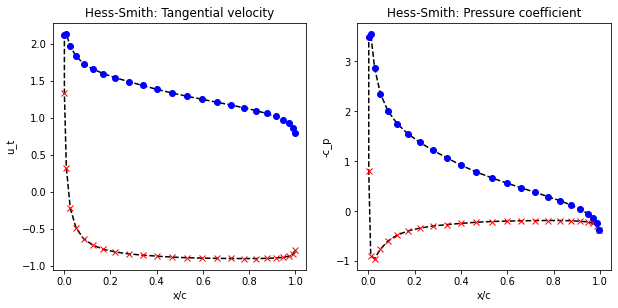

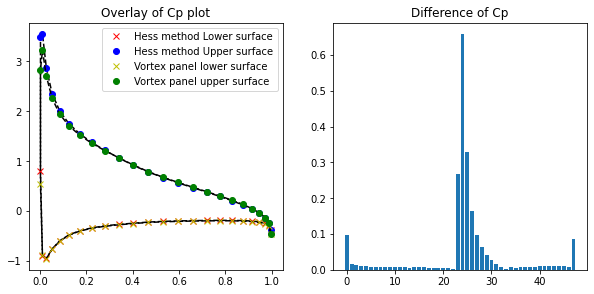

In [ ]:
import time, copy
import numpy as np
from matplotlib import pyplot as plt

# Command Line Options

# Thickness function of NACA 4-digit airfoil series, with maximum thickness, 
# 'mThk', (as a fraction of chord) specified outside the function
#
#
# INPUT:
# x_by_c : Coordinate(s) along chord, normalized by chord (LE = 0; TE = 1);
#          can be scalar (single) value or array of coordinates
#
# OUTPUT:
# thk : Thickness at supplied chord locations; size is same as x_by_c
def y_t(x_by_c):
    if np.any(x_by_c < 0) or np.any(x_by_c > 1):
        raise Exception('Argument cannot be outside [0, 1]')
    thk = 5*mThk*(0.2969*np.sqrt(x_by_c) - 0.126*x_by_c \
        - 0.3516*np.square(x_by_c) + 0.2843*np.power(x_by_c,3) \
        - 0.1036*np.power(x_by_c,4))
    return thk

# Camber function of NACA 4-digit airfoil series, with maximum camber, 'mCmbr',
# and its position, 'pCmbr', (both as fraction of chord) specified outside the
# function
#
# INPUT:
# x_by_c : Coordinate(s) along chord, normalized by chord (LE = 0; TE = 1);
#          can be scalar (single) value or array of coordinates
#
# OUTPUT:
# thk : Thickness at supplied chord locations; size is same as x_by_c
def y_c(x_by_c):
    singleton = False
    if not isinstance(x_by_c,np.ndarray):
        singleton = True
        x_copy = np.array([x_by_c]) #Create a new singleton array
    else:
        x_copy = copy.deepcopy(x_by_c) #Make a copy (instead of a pointer)
    cmbr = np.zeros_like(x_copy)
    iL = x_copy <= pCmbr
    iT = x_copy > pCmbr
    cmbr[iL] = mCmbr/pCmbr**2*(2*pCmbr*x_copy[iL]-np.square(x_copy[iL]))
    cmbr[iT] = mCmbr/(1-pCmbr)**2 \
        *(1-2*pCmbr+2*pCmbr*x_copy[iT]-np.square(x_copy[iT]))
    if singleton:
        cmbr = cmbr[0] #Output dimension (scalar or array) must be same as input
    return cmbr        

# Upper surface function, using thickness and camber functions defined above
def y_u(x_by_c):
    return y_c(x_by_c) + y_t(x_by_c)

# Lower surface function, using thickness and camber functions defined above
def y_l(x_by_c):
    return y_c(x_by_c) - y_t(x_by_c)


# Solve the problem
t0 = time.time() # Note the current time

vp =VortexPanel2D(nPnl,y_u,y_l) #Instantiate vortex panel class with requisite inputs
gammaP, Vts, c_p, c_l, c_l_alt = vp.solve(AoA) #Solve for a particular AoA


hm =Hess_Method(nPnl,y_u,y_l) #Instantiate Hess_method with requisite inputs
SourceP_hs,gammaP_hs, Vts_hs, c_p_hs, c_l_hs = hm.solve(AoA) #Solve for a particular AoA
print ('Elapsed time = ',time.time() - t0) #Report the elapsed time

print('Number of panels: {}'.format(nPnl))
print('Vortex Panel method: c_l from c_p = ',round(c_l,4))
print ('Hess-Smith Method: c_l from c_p = ',round(c_l_hs,4))

# Plotting of results 
plt.figure()
plt.subplot(2,2,1)
plt.title('Hess-Smith: Tangential velocity')
plt.plot(hm.pnlMids[:,0],Vts_hs,'k--', \
    hm.pnlMids[hm.iPanelsL,0],Vts_hs[hm.iPanelsL],'rx', \
    hm.pnlMids[hm.iPanelsU,0],Vts_hs[hm.iPanelsU],'bo')
plt.xlabel('x/c')
plt.ylabel('u_t')

plt.subplot(2,2,2)
plt.title('Hess-Smith: Pressure coefficient')
plt.plot(hm.pnlMids[:,0],-c_p_hs,'k--', \
    hm.pnlMids[hm.iPanelsL,0],-c_p_hs[hm.iPanelsL],'rx', \
    hm.pnlMids[hm.iPanelsU,0],-c_p_hs[hm.iPanelsU],'bo')
plt.xlabel('x/c');  plt.ylabel('-c_p')
plt.rcParams["figure.figsize"] = (10,10)

plt.figure()
plt.subplot(2,2,1)
plt.title('Overlay of Cp plot')
plt.plot(hm.pnlMids[:,0],-c_p_hs,'k--')
plt.plot(hm.pnlMids[hm.iPanelsL,0],-c_p_hs[hm.iPanelsL],'rx',label='Hess method Lower surface')
plt.plot(hm.pnlMids[hm.iPanelsU,0],-c_p_hs[hm.iPanelsU],'bo',label='Hess method Upper surface')
plt.plot(vp.pnlMids[:,0],-c_p,'k--')
plt.plot(vp.pnlMids[vp.iPanelsL,0],-c_p[vp.iPanelsL],'yx',label='Vortex panel lower surface')
plt.plot(vp.pnlMids[vp.iPanelsU,0],-c_p[vp.iPanelsU],'go',label='Vortex panel upper surface')
plt.legend()

plt.subplot(2,2,2)
plt.title('Difference of Cp')

difference = abs(abs(c_p_hs) - abs(c_p))
X_values = [i for i in range(len(difference))]
plt.bar(X_values,difference)
